# Chocolate Scraping with Beautiful Soup

After eating chocolate bars your whole life, you've decided to go on a quest to find the greatest chocolate bar in the world.

You've found a website that has over 1700 reviews of chocolate bars from all around the world. It's linked below the text for the first task.

The data is displayed in a <a href="https://content.codecademy.com/courses/beautifulsoup/cacao/index.html">table</a>, instead of in a `csv` or `json`. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

**Preparation/Importing Packages**

In [23]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

**Web Scraping**

In [2]:
# Specifying URL
url = "https://content.codecademy.com/courses/beautifulsoup/cacao/index.html"

# Requesting for response
webpage_response = requests.get(url)
webpage = webpage_response.content

# Creating Soup
soup = BeautifulSoup(webpage, "html.parser")

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

**Distribution of Ratings**

In [3]:
# Scraping ratings
rate_list = soup.find_all(attrs={"class": "Rating"})

# Viewing result to see how to iterate
rate_list

[<td class="Rating">Rating</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">4</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3</td>,
 <td class="Rating">3.25</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3</td>,
 <td class="Rating">3.25</td>,
 <td class="Rating">4</td>,
 <td class="Rating">3.25</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">4</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3.25</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3</td>,
 <td class="Rating">3</td>,
 <td cl

In [4]:
# Creating empty rating list
rating = []

# Iterating - starting at index 1 because of header
for rate in rate_list[1:]:
    rate_text = rate.get_text() # Pulling out string
    rating.append(float(rate_text)) # Converting string rate to float rate before appending to list
    
# Viewing result
rating

[3.75,
 2.75,
 3.0,
 3.5,
 3.5,
 2.75,
 3.5,
 3.5,
 3.75,
 4.0,
 2.75,
 3.0,
 3.25,
 3.75,
 2.75,
 3.0,
 3.25,
 4.0,
 3.25,
 3.5,
 4.0,
 3.5,
 3.75,
 3.75,
 3.75,
 2.75,
 3.25,
 3.5,
 3.5,
 2.75,
 3.0,
 3.0,
 3.75,
 2.75,
 2.75,
 2.75,
 2.75,
 3.0,
 2.5,
 2.5,
 3.5,
 3.5,
 3.5,
 3.5,
 2.75,
 3.0,
 2.5,
 2.5,
 2.75,
 2.5,
 3.0,
 3.25,
 3.0,
 3.25,
 4.0,
 3.75,
 4.0,
 3.0,
 3.0,
 2.75,
 3.5,
 3.0,
 3.75,
 3.0,
 2.75,
 2.75,
 3.0,
 3.25,
 3.5,
 3.0,
 3.25,
 3.25,
 3.25,
 3.25,
 3.5,
 3.75,
 4.0,
 4.0,
 5.0,
 3.0,
 3.0,
 3.5,
 3.75,
 4.0,
 3.5,
 3.5,
 5.0,
 4.0,
 3.25,
 2.75,
 3.75,
 3.75,
 4.0,
 3.0,
 3.5,
 3.0,
 2.5,
 2.75,
 3.0,
 3.5,
 3.75,
 3.5,
 3.25,
 3.25,
 3.5,
 3.75,
 3.5,
 4.0,
 4.0,
 3.75,
 3.25,
 3.25,
 3.5,
 3.5,
 3.75,
 3.5,
 3.75,
 4.0,
 2.75,
 3.25,
 3.5,
 3.25,
 3.75,
 4.0,
 2.75,
 1.75,
 3.75,
 3.25,
 3.25,
 3.5,
 2.5,
 2.75,
 1.75,
 3.0,
 3.0,
 3.25,
 3.75,
 2.75,
 3.75,
 3.75,
 3.75,
 3.75,
 2.5,
 3.0,
 3.25,
 3.5,
 3.0,
 2.5,
 2.5,
 2.75,
 3.5,
 3.5,
 4.0,
 3.25,
 3.5

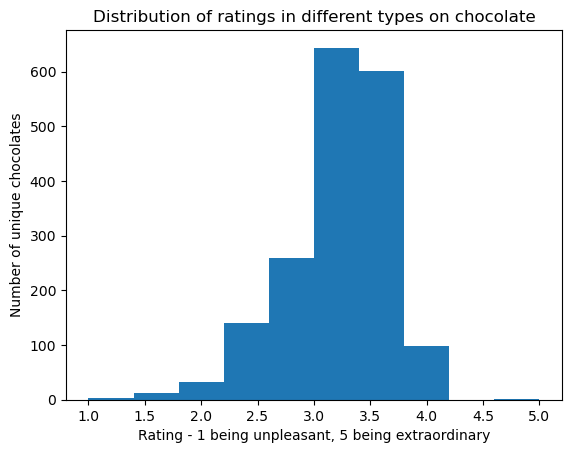

In [5]:
# Creating histogram
plt.hist(rating)
plt.xlabel("Rating - 1 being unpleasant, 5 being extraordinary")
plt.ylabel("Number of unique chocolates")
plt.title("Distribution of ratings in different types on chocolate")
plt.show()

**Which chocolatier makes the best chocolate?**

In [6]:
# Finding company names
company_list = soup.find_all(attrs={"class": "Company"})

company_list

[<td class="Company">Company 
                (Maker-if known)
             </td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">Acalli</td>,
 <td class="Company">Acalli</td>,
 <td class="Company">

In [7]:
# Creating empty company list
companies = []

# Iterating - starting at index 1 because of header
for company in company_list[1:]:
    company_text = company.get_text() # Pulling out string
    companies.append(company_text)
    
# Viewing result
companies

['A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'Acalli',
 'Acalli',
 'Adi',
 'Adi',
 'Adi',
 'Adi',
 'Aequare (Gianduja)',
 'Aequare (Gianduja)',
 'Ah Cacao',
 "Akesson's (Pralus)",
 "Akesson's (Pralus)",
 "Akesson's (Pralus)",
 'Alain Ducasse',
 'Alain Ducasse',
 'Alain Ducasse',
 'Alain Ducasse',
 'Alain Ducasse',
 'Alexandre',
 'Alexandre',
 'Alexandre',
 'Alexandre',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amatller (Simon Coll)

In [10]:
# Creating DataFrame with company and rating together
company = pd.DataFrame({"Company Name": companies, "Rating": rating})

# Viewing company DataFrame
company

,Company Name,Rating
0,A. Morin,3.75
1,A. Morin,2.75
2,A. Morin,3.00
3,A. Morin,3.50
4,A. Morin,3.50


In [12]:
# Determining average of rating in each company listed
company_avg = company.groupby("Company Name").mean()

# Viewing result
company_avg

,Rating
Company Name,
A. Morin,3.380435
AMMA,3.500000
Acalli,3.750000
Adi,3.250000
Aequare (Gianduja),2.875000
...,...
hello cocoa,3.125000
hexx,3.050000
iQ Chocolate,2.875000


In [13]:
# Finding 10 top companies based on average rating
company_avg.nlargest(10, "Rating")

,Rating
Company Name,
Tobago Estate (Pralus),4.000000
Heirloom Cacao Preservation (Zokoko),3.875000
Ocelot,3.875000
Amedei,3.846154
Matale,3.812500
Patric,3.791667
Idilio (Felchlin),3.775000
Acalli,3.750000
Chocola'te,3.750000


**Is more cacao better?**

In [14]:
# Finding cacao percentages
percentage = soup.find_all(attrs={"class": "CocoaPercent"})

percentage

[<td class="CocoaPercent">Cocoa
                Percent
             </td>,
 <td class="CocoaPercent">63%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">63%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">63%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent

In [16]:
# Creating empty cpercent list
cpercent = []

# Iterating - starting at index 1 because of header
for result in percentage[1:]:
    percent_text = result.get_text() # Pulling out string
    percent_text = percent_text.replace("%","") # Removing % symbol
    cpercent.append(float(percent_text)) # Converting string rate to float rate before appending to list
    
# Viewing result
cpercent

[63.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 63.0,
 70.0,
 63.0,
 70.0,
 70.0,
 60.0,
 80.0,
 88.0,
 72.0,
 55.0,
 70.0,
 70.0,
 75.0,
 75.0,
 75.0,
 65.0,
 75.0,
 75.0,
 75.0,
 75.0,
 70.0,
 70.0,
 70.0,
 70.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 80.0,
 60.0,
 60.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 85.0,
 85.0,
 72.0,
 73.0,
 64.0,
 66.0,
 75.0,
 63.0,
 70.0,
 68.0,
 70.0,
 70.0,
 75.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 63.0,
 70.0,
 66.0,
 75.0,
 85.0,
 50.0,
 75.0,
 60.0,
 75.0,
 75.0,
 75.0,
 72.0,
 75.0,
 75.0,
 70.0,
 70.0,
 73.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 73.0,
 70.0,
 68.0,
 70.0,
 70.0,
 70.0,
 70.0,
 75.0,
 70.0,
 75.0,
 72.0,
 72.0,
 72.0,
 72.0,
 100.0,
 72.0,
 72.0,
 72.0,
 72.0,
 75.0,
 72.0,
 72.0,
 80.0,
 75.0,
 72.0,
 72.0,
 72.0,
 68.0,
 72.0,
 70.0,
 77.0,
 75.0

In [17]:
# Adding data from cpercent to existing DataFrame
company["Cocoa Percentage"] = cpercent

# Viewing result
company.head(15)

,Company Name,Rating,Cocoa Percentage
0,A. Morin,3.75,63.0
1,A. Morin,2.75,70.0
2,A. Morin,3.00,70.0
3,A. Morin,3.50,70.0
4,A. Morin,3.50,70.0
5,A. Morin,2.75,70.0
6,A. Morin,3.50,70.0
7,A. Morin,3.50,70.0
8,A. Morin,3.75,70.0
9,A. Morin,4.00,70.0


Correlation: -0.16482017762424464
p-value: 2.1215999288693103e-12


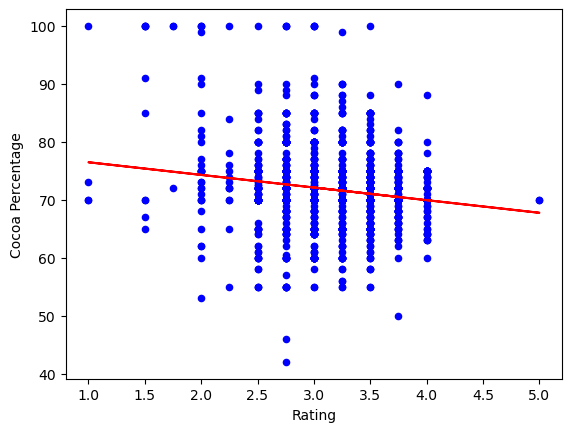

In [26]:
# Creating scatter plot
company.plot.scatter(x="Rating", y="Cocoa Percentage", c="Blue")

# Creating linear regression model
x_values = company["Rating"]
y_values = company["Cocoa Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Placing model into same plot
plt.plot(x_values,regress_values,"r-")

# Determining correleation
corr = company["Rating"].corr(company["Cocoa Percentage"])
print(f"Correlation: {corr}")
print(f"p-value: {pvalue}")

Statistically significant yet weak negative correlation between cocoa percentage and rating.